In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# EDA

In [122]:
df = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-122-e60a80b46a6c>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [123]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [64]:
df['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [65]:
df.loc[df['neighbourhood group'] == 'brookln'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan'] = 'Manhattan'

In [66]:
cwd = os.getcwd()
path = cwd + '/clean_airbnb.csv'
df.to_csv(path, index=False)

In [126]:
import re

# Clean the Price Column
def clean_price(price):
    if price:
        numeric_price = re.sub("[^0-9.]", "", str(price))
        if numeric_price:
            return float(numeric_price)
    return None

df["price"] = df["price"].apply(clean_price)


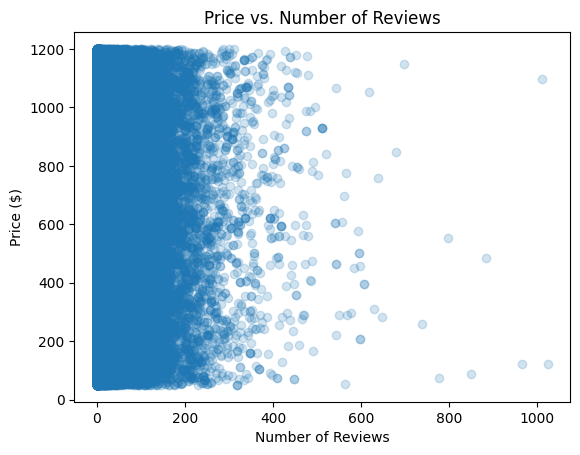

In [116]:
# Plotting differences between Borough and Room Type
# Select the columns of interest
df2 = df[["number of reviews", "price"]]

# Drop any rows with missing values
df2 = df2.dropna()

# Create a scatter plot of price vs. number of reviews
plt.scatter(df2["number of reviews"], df2["price"], alpha=0.2)

# Add labels and titles to the plot
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.title("Price vs. Number of Reviews")

# Show the plot
plt.show()

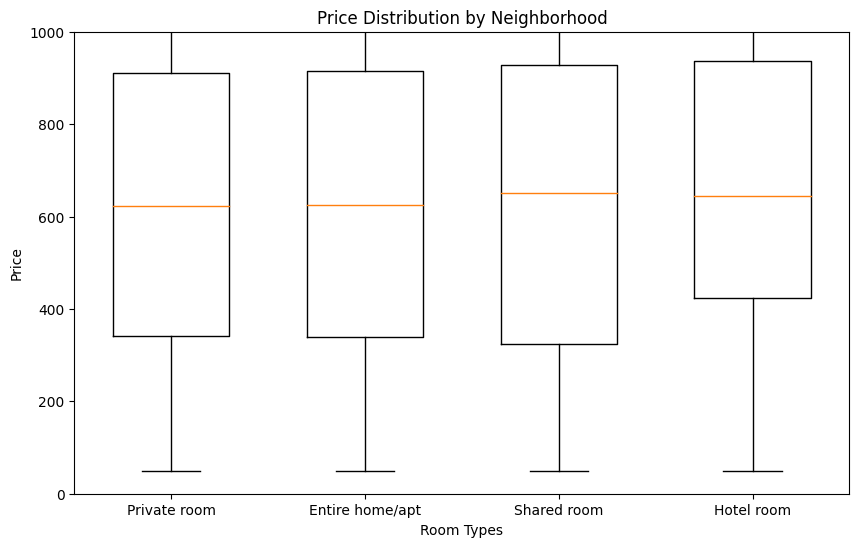

In [138]:
import seaborn as sns

# Make a new df
df2 = df.loc[:, ["room type", "price"]]

df2 = df2.dropna()

neighborhoods = df2["room type"].unique()

# Create a new figure to hold the boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each neighborhood and create a boxplot of its prices
for i, neighborhood in enumerate(neighborhoods):
    neighborhood_data = df2[df2["room type"] == neighborhood]["price"]
    ax.boxplot(neighborhood_data, positions=[i+1], widths=0.6)

# Add labels and titles to the plot
ax.set_xticks(range(1, len(neighborhoods)+1))
ax.set_xticklabels(neighborhoods)
ax.set_xlabel("Room Types")
ax.set_ylabel("Price")
ax.set_title("Price Distribution by Neighborhood")
ax.set_ylim([0, 1000])


# Show the plot
plt.show()